In [1]:
#Stock price Prediction using Random Forest Regression

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the dataset
dataset = pd.read_csv('NSE-TATAGLOBAL.csv')
dataset.head()
#Getting the close price
dataset = dataset[['Close']]
dataset.head()

,Close
0,233.75
1,233.25
2,234.25
3,236.10
4,233.30


In [3]:
#A variable for predicting 'n' days out into the future
forecast_out = 10 #'n=any integer' days
#Create another column (the target ) shifted 'n' units up
dataset['Prediction'] = dataset[['Close']].shift(-forecast_out)
dataset.head()

,Close,Prediction
0,233.75,222.65
1,233.25,216.00
2,234.25,222.00
3,236.10,222.95
4,233.30,221.05


In [4]:
#Create the independent data set (X)  Convert the dataframe to a numpy array
X = np.array(dataset.drop(['Prediction'],1))
#Remove the last '10' rows
X = X[:-forecast_out]
print(X)

#Create the dependent data set (y)  Convert the dataframe to a numpy array
y = np.array(dataset['Prediction'])
#Get all of the y values except the last '10' rows
y = y[:-forecast_out]
print(y)

[[233.75]
 [233.25]
 [234.25]
 ...
 [112.1 ]
 [114.05]
 [116.5 ]]
[222.65 216.   222.   ... 120.65 120.9  121.55]


C:\Users\Shashwat\AppData\Local\Temp\ipykernel_3816\2389815230.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataset.drop(['Prediction'],1))


In [5]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
#Create and train the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
#Create a rf Classifier
rf = RandomForestRegressor(n_estimators=100)
#Train the model using the training sets
rf.fit(x_train, y_train)

RandomForestRegressor()

In [7]:
#Testing Model: Score returns the coefficient of determination R^2 of the prediction.
rf_confidence = rf.score(x_test, y_test)
print("rf confidence: ", rf_confidence)

#Set x_forecast equal to the last 30 rows of the original data set from the Close column
x_forecast = np.array(dataset.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

rf confidence:  0.9412203965162739
[[118.3 ]
 [117.3 ]
 [116.05]
 [116.6 ]
 [118.25]
 [118.65]
 [117.6 ]
 [120.65]
 [120.9 ]
 [121.55]]


C:\Users\Shashwat\AppData\Local\Temp\ipykernel_3816\3060488571.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_forecast = np.array(dataset.drop(['Prediction'],1))[-forecast_out:]


In [8]:
#Print rf prediction for the next '30' days
rf_prediction = rf.predict(x_forecast)
print(rf_prediction)

[120.34484524 124.97971786  98.993      118.068      114.94716667
 132.4381     119.68604167 118.644      118.001625   119.1605    ]


C:\Users\Shashwat\AppData\Local\Temp\ipykernel_3816\1110929035.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


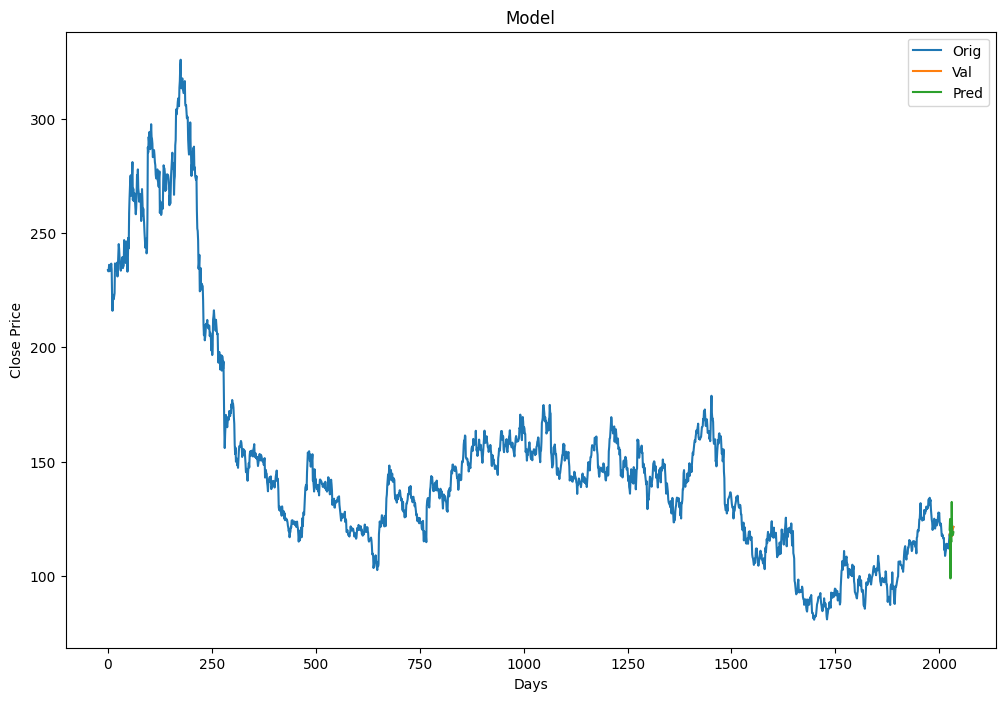

In [9]:
#Visualize the data
predictions = rf_prediction

valid = dataset[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(dataset['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()